In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Base-Model PhysioNet

### Training Curve

In [2]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_physio_34_10_65_90_101/2023-04-25_16-09-09_correctedBug/hist.pkl"
with open(path, 'rb') as file:
    history = pickle.load(file)

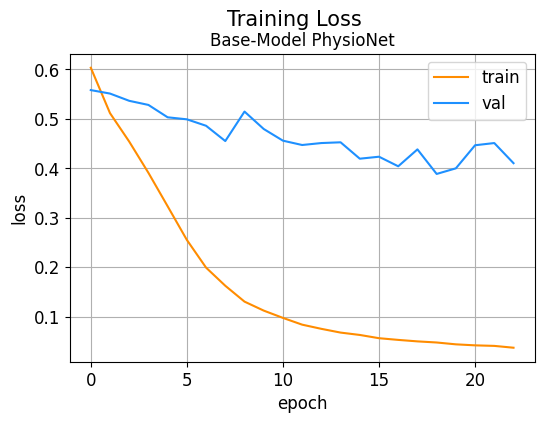

In [8]:
fig, ax = plt.subplots(1,figsize=(6,4))

ax.plot(history['loss'], color="darkorange")
ax.plot(history['val_loss'], color="dodgerblue")
plt.title('Base-Model PhysioNet',fontsize=12)
plt.suptitle('Training Loss',fontsize=15, y=0.99)

ax.set_ylabel('loss', fontsize=12)
ax.set_xlabel('epoch', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['train', 'val'], loc='upper right', fontsize=12)
plt.grid()
plt.show()

In [9]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/training_curve_physio.png", bbox_inches='tight')

### Confusion Matrix

In [108]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_physio_34_10_65_90_101/2023-04-25_16-09-09_correctedBug/confusion_matrix_2023-04-25_16-09-09.pkl"
with open(path, 'rb') as file:
    cm = pickle.load(file)

In [109]:
cm

{'TN': 597, 'FP': 68, 'FN': 99, 'TP': 552}

### Classification Report

In [110]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_physio_34_10_65_90_101/classification_report_2023-04-25_16-09-09.pkl"
with open(path, 'rb') as file:
    cr = pickle.load(file)

In [111]:
print(cr)

              precision    recall  f1-score   support

           L       0.86      0.90      0.88       665
           R       0.89      0.85      0.87       651

    accuracy                           0.87      1316
   macro avg       0.87      0.87      0.87      1316
weighted avg       0.87      0.87      0.87      1316



# Fine Tuning: PhysioNet

### Training curve

In [10]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/leave_subjects_out/test_anna/hist.pkl"
with open(path, 'rb') as file:
    history = pickle.load(file)

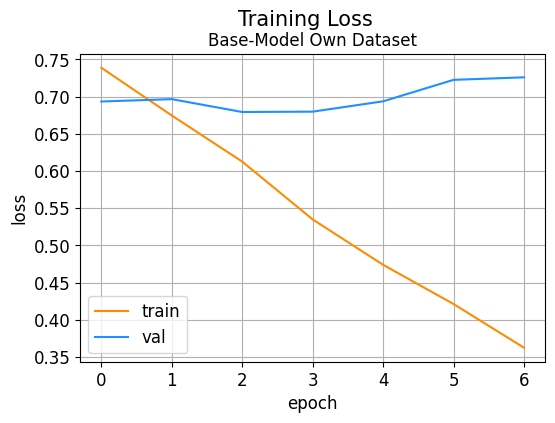

In [12]:
fig, ax = plt.subplots(1,figsize=(6,4))

ax.plot(history['loss'], color="darkorange")
ax.plot(history['val_loss'], color="dodgerblue")
plt.title('Base-Model Own Dataset',fontsize=12)
plt.suptitle('Training Loss',fontsize=15, y=0.99)

ax.set_ylabel('loss', fontsize=12)
ax.set_xlabel('epoch', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['train', 'val'], loc='lower left', fontsize=12)
plt.grid()
plt.show()

In [13]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/training_curve_own.png", bbox_inches='tight')

In [112]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_08-44-51.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)

In [114]:
test_subjects = list(test_acc.keys())

In [115]:
test_acc[test_subjects[0]]['NotTuned']

[0.5925925970077515,
 0.6666666865348816,
 0.5384615659713745,
 0.5384615659713745,
 0.7307692170143127]

## Without finetuning

In [143]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects_without = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects_without.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies before Finetuning:

Subject 34: 0.613390326499939
Subject 10: 0.5037037074565888
Subject 65: 0.7122507214546203
Subject 90: 0.6518518447875976
Subject 101: 0.7339031338691712


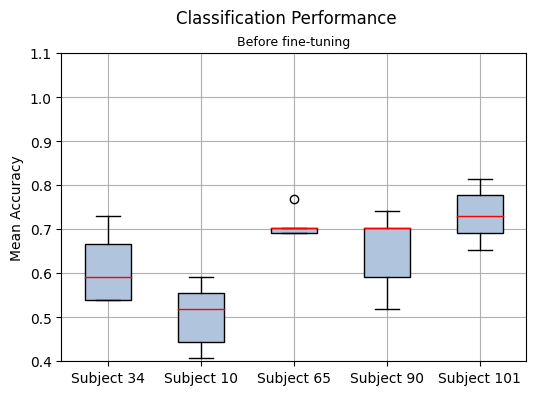

In [144]:
fig, ax = plt.subplots(1,figsize=(6,4))
bp = ax.boxplot(data_subjects_without, labels=["Subject 34", "Subject 10", "Subject 65","Subject 90", "Subject 101"], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)
ax.set_ylim(0.4,1.1)

for median in bp['medians']:
    median.set_color('red')
    
plt.title('Before fine-tuning',fontsize=9)
plt.suptitle("Classification Performance",fontsize=12, y=0.99)
ax.set_ylabel('Mean Accuracy')
plt.grid()

In [145]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_basephysio_physio_before.png", bbox_inches='tight')

## With finetuning

In [146]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies after Finetuning:

Subject 34: 0.7871794819831848
Subject 10: 0.9259259223937988
Subject 65: 0.9008546948432923
Subject 90: 0.9555555582046509
Subject 101: 0.8715099811553955


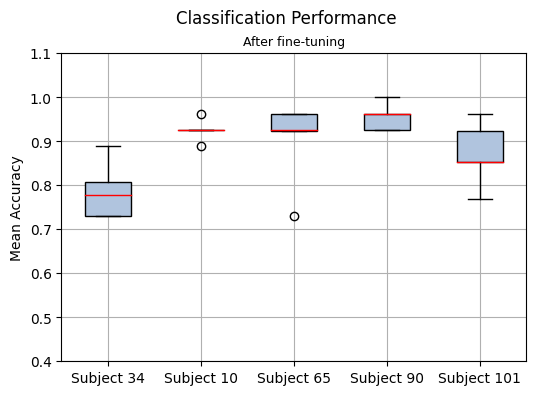

In [147]:
fig, ax = plt.subplots(1,figsize=(6,4))
bp = ax.boxplot(data_subjects, labels=["Subject 34", "Subject 10", "Subject 65","Subject 90", "Subject 101"], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)
ax.set_ylim(0.4,1.1)

for median in bp['medians']:
    median.set_color('red')
    
plt.title('After fine-tuning',fontsize=9)
plt.suptitle("Classification Performance",fontsize=12, y=0.99)
ax.set_ylabel('Mean Accuracy')
plt.grid()

In [148]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_basephysio_physio_after.png", bbox_inches='tight')

# Fine Tuning: Own data on PhysioNet-Basemodel

In [163]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_09-49-59.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)

In [164]:
test_subjects = list(test_acc.keys())

In [165]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies before Finetuning:

Subject dani: 0.49722222089767454
Subject ivo: 0.47777777910232544
Subject pablo: 0.5414889454841614
Subject huiyu: 0.5265384674072265
Subject manu: 0.528644061088562
Subject fabio: 0.5638888835906982
Subject anna: 0.5111111164093017
Subject luisa: 0.46111111640930175
Subject sarah: 0.5041471064090729
Subject irene: 0.4255191206932068
Subject jan: 0.5233589053153992


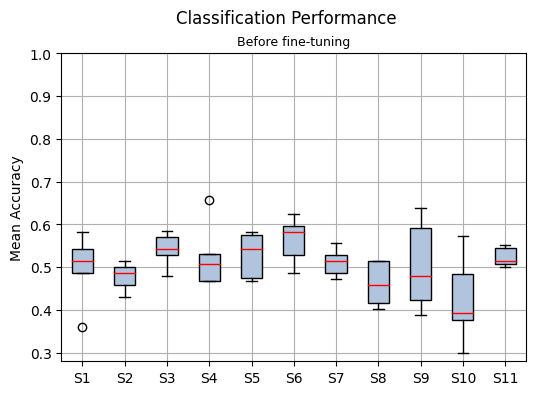

In [166]:
fig, ax = plt.subplots(1,figsize=(6,4))
bp = ax.boxplot(data_subjects, labels=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11"], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)
ax.set_ylim(0.28,1.0)

for median in bp['medians']:
    median.set_color('red')
    
plt.title('Before fine-tuning',fontsize=9)
plt.suptitle("Classification Performance",fontsize=12, y=0.99)
ax.set_ylabel('Mean Accuracy')
plt.grid()

In [167]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_basephysio_own_before.png", bbox_inches='tight')

In [168]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies after Finetuning:

Subject dani: 0.75
Subject ivo: 0.5916666626930237
Subject pablo: 0.7321529150009155
Subject huiyu: 0.7167307734489441
Subject manu: 0.599435031414032
Subject fabio: 0.675
Subject anna: 0.9194444298744202
Subject luisa: 0.9499999761581421
Subject sarah: 0.8627151727676392
Subject irene: 0.4944808602333069
Subject jan: 0.5320119321346283


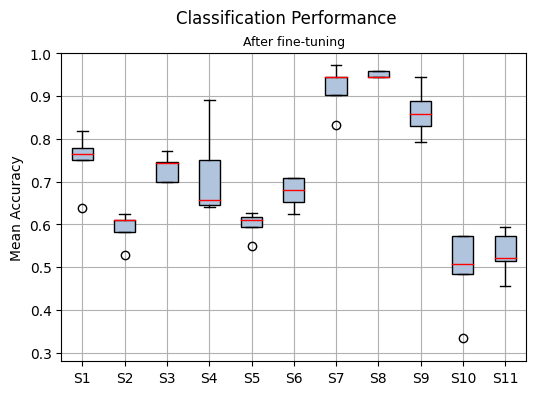

In [169]:
fig, ax = plt.subplots(1,figsize=(6,4))
bp = ax.boxplot(data_subjects, labels=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11"], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)
ax.set_ylim(0.28,1.0)

for median in bp['medians']:
    median.set_color('red')
    
plt.title('After fine-tuning',fontsize=9)
plt.suptitle("Classification Performance",fontsize=12, y=0.99)
ax.set_ylabel('Mean Accuracy')
plt.grid()

In [170]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_basephysio_own_after.png", bbox_inches='tight')

# Fine Tuning: Own data on own base-model
## 3 channels

In [173]:
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/mydataset_base/correctedBug/test_accuracies_2023-04-27_12-58-42.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

In [179]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies before Finetuning:

Subject dani: 0.43611111044883727
Subject ivo: 0.46111111640930175
Subject pablo: 0.47014084458351135
Subject huiyu: 0.4953365385532379
Subject manu: 0.4748587548732758
Subject fabio: 0.5416666626930237
Subject anna: 0.5277777731418609
Subject luisa: 0.5027777671813964
Subject sarah: 0.4760172128677368
Subject irene: 0.4683060050010681
Subject jan: 0.4823103129863739


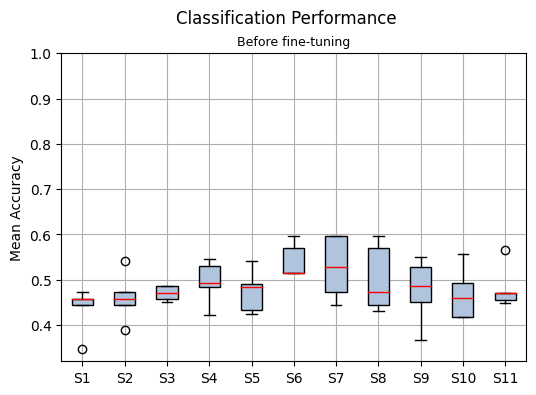

In [180]:
fig, ax = plt.subplots(1,figsize=(6,4))
bp = ax.boxplot(data_subjects, labels=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11"], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)
ax.set_ylim(0.32,1.0)

for median in bp['medians']:
    median.set_color('red')
    
plt.title('Before fine-tuning',fontsize=9)
plt.suptitle("Classification Performance",fontsize=12, y=0.99)
ax.set_ylabel('Mean Accuracy')
plt.grid()

In [181]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_baseown_own_before.png", bbox_inches='tight')

In [182]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

Average Test Accuracies after Finetuning:

Subject dani: 0.6916666567325592
Subject ivo: 0.5999999880790711
Subject pablo: 0.6865593671798706
Subject huiyu: 0.6169230818748475
Subject manu: 0.55559321641922
Subject fabio: 0.625
Subject anna: 0.7694444417953491
Subject luisa: 0.8861111164093017
Subject sarah: 0.7562206506729126
Subject irene: 0.48163933753967286
Subject jan: 0.5905797123908997


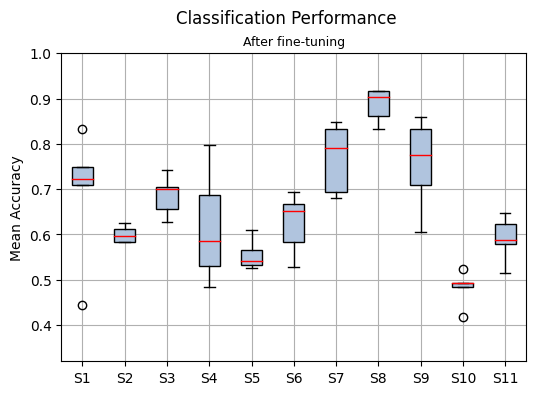

In [183]:
fig, ax = plt.subplots(1,figsize=(6,4))
bp = ax.boxplot(data_subjects, labels=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11"], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)
ax.set_ylim(0.32,1.0)

for median in bp['medians']:
    median.set_color('red')
    
plt.title('After fine-tuning',fontsize=9)
plt.suptitle("Classification Performance",fontsize=12, y=0.99)
ax.set_ylabel('Mean Accuracy')
plt.grid()

In [184]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_baseown_own_after.png", bbox_inches='tight')

# Summarized Evaluation of Fine-Tuning Configurations

In [14]:
# PhysioNet Basemodel - PhysioNet Fine-Tuning
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_08-44-51.pkl"
with open(path, 'rb') as file:
    test_acc_physio_physio = pickle.load(file)
    
# PhysioNet Basemodel - Own Fine-Tuning
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_09-49-59.pkl"
with open(path, 'rb') as file:
    test_acc_physio_own = pickle.load(file)

# Own Basemodel - Own Fine-Tuning
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/mydataset_base/correctedBug/test_accuracies_2023-04-27_12-58-42.pkl"
with open(path, 'rb') as file:
    test_acc_own_own = pickle.load(file)

test_subjects_physio = list(test_acc_physio_physio.keys())
test_subjects_own = list(test_acc_own_own.keys())

In [15]:
data_physio_physio = {'base':[], 'finetuned':[]}
for sub in test_subjects_physio:
    acc_base = test_acc_physio_physio[sub]['NotTuned']
    data_physio_physio['base'].append(np.mean(acc_base))
    acc = test_acc_physio_physio[sub]['FineTuned']
    data_physio_physio['finetuned'].append(np.mean(acc))
print(f"Physio basemodel - Physio Subjects not finetuned: {np.mean(data_physio_physio['base'])}")
print(f"Physio basemodel - Physio Subjects finetuned: {np.mean(data_physio_physio['finetuned'])}")
    
data_physio_own = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_physio_own[sub]['NotTuned']
    data_physio_own['base'].append(np.mean(acc_base))
    acc = test_acc_physio_own[sub]['FineTuned']
    data_physio_own['finetuned'].append(np.mean(acc))
print(f"Physio basemodel - Own Subjects not finetuned: {np.mean(data_physio_own['base'])}")
print(f"Physio basemodel - Own Subjects: {np.mean(data_physio_own['finetuned'])}")

data_own_own = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_own_own[sub]['NotTuned']
    data_own_own['base'].append(np.mean(acc_base))
    acc = test_acc_own_own[sub]['FineTuned']
    data_own_own['finetuned'].append(np.mean(acc))
print(f"Own basemodel - Own Subjects not finetuned: {np.mean(data_own_own['base'])}")
print(f"Own basemodel - Own Subjects: {np.mean(data_own_own['finetuned'])}")


Physio basemodel - Physio Subjects not finetuned: 0.6430199468135833
Physio basemodel - Physio Subjects finetuned: 0.8882051277160645
Physio basemodel - Own Subjects not finetuned: 0.5055279748006302
Physio basemodel - Own Subjects: 0.7112397957931865
Own basemodel - Own Subjects not finetuned: 0.4851285544308748
Own basemodel - Own Subjects: 0.6599761426448822


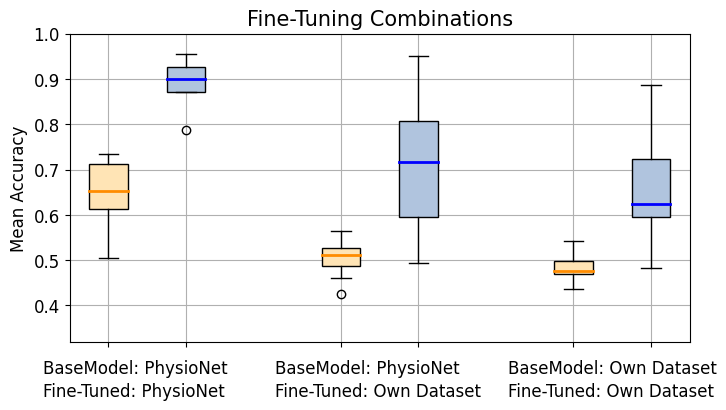

In [20]:
fig, ax = plt.subplots(1,figsize=(8,4))
bp1 = ax.boxplot([data_physio_physio['base'], data_physio_own['base'], data_own_own['base']], labels=["", "", ""],  positions=[1,4,7], boxprops=dict(facecolor='moccasin'),patch_artist=True)
bp2 = ax.boxplot([data_physio_physio['finetuned'], data_physio_own['finetuned'], data_own_own['finetuned']], labels=["", "", ""], positions=[2,5,8], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)

ax.text(0.15, 0.25, "BaseModel: PhysioNet", fontsize=12)
ax.text(3.15, 0.25, "BaseModel: PhysioNet", fontsize=12)
ax.text(6.15, 0.25, "BaseModel: Own Dataset", fontsize=12)

ax.text(0.15, 0.2, "Fine-Tuned: PhysioNet", fontsize=12)
ax.text(3.15, 0.2, "Fine-Tuned: Own Dataset", fontsize=12)
ax.text(6.15, 0.2, "Fine-Tuned: Own Dataset", fontsize=12)


ax.set_ylim(0.32,1.0)

for median in bp1['medians']:
    median.set_color('darkorange')
    median.set_linewidth(2)
    
for median in bp2['medians']:
    median.set_color('blue')
    median.set_linewidth(2)
    
plt.title("Fine-Tuning Combinations",fontsize=15)
plt.yticks(fontsize=12)
ax.set_ylabel('Mean Accuracy', fontsize=12)
# ax.text(6, 0.92,"yellow: Before Fine-Tuning\nblue: After Fine-Tuning", backgroundcolor="white", fontsize=10)
plt.grid()

In [21]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_finetuning_combinations.png", bbox_inches='tight')

# Fine Tuning: Own data on Physionet base-model
## 6 channels

In [19]:
# path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_6_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_22-48-56.pkl"
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/ours_6_pairs/fine_tuned/physionet_base/test_accuracies_2023-05-05_13-24-33.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies before Finetuning:

Subject dani: 0.5055555582046509
Subject ivo: 0.5319444417953492
Subject pablo: 0.47721378207206727
Subject huiyu: 0.4985828518867493
Subject manu: 0.5370460212230682
Subject fabio: 0.5458333432674408
Subject anna: 0.5263888895511627
Subject luisa: 0.4180555582046509
Subject sarah: 0.5111691057682037
Subject irene: 0.48674975633621215
Subject jan: 0.5189029633998871


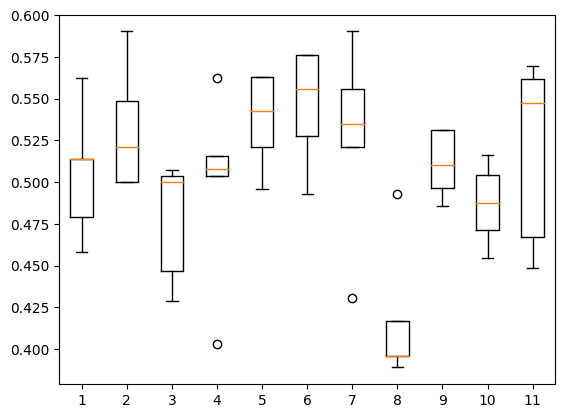

In [20]:
print("Average Test Accuracies before Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['NotTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")
    
plt.boxplot(data_subjects)
plt.show()

Average Test Accuracies after Finetuning:

Subject dani: 0.9097222447395324
Subject ivo: 0.8486111164093018
Subject pablo: 0.937304961681366
Subject huiyu: 0.894089138507843
Subject manu: 0.8535821199417114
Subject fabio: 0.9069444417953492
Subject anna: 0.9833333492279053
Subject luisa: 0.9972222328186036
Subject sarah: 0.9664138555526733
Subject irene: 0.8151334524154663
Subject jan: 0.8333404898643494


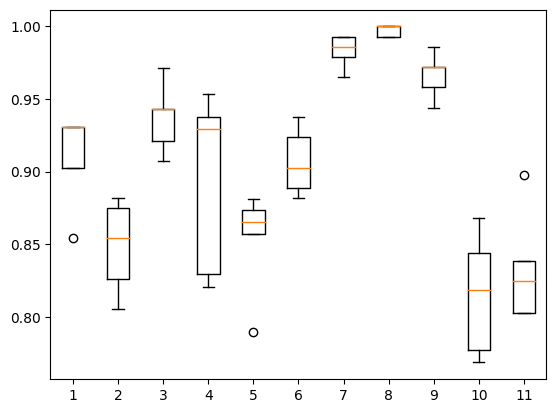

In [21]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()

## Channel accuracies

In [22]:
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/ours_6_pairs/fine_tuned/physionet_base/ch_pair_accuracies_2023-05-05_13-24-33.pkl"

In [23]:
with open(path, 'rb') as file:
    log_accuracies = pickle.load(file)

In [24]:
test_subjects = list(log_accuracies.keys())
channels = [["C3","C4"],["F3","F4"],["P3","P4"],["FP1","FP2"],["F7","F8"],["T3","T4"]]

In [25]:
# Calc mean accuracies
for sub in test_subjects:
    print(f"Subject {sub}:\n")
    for ch_pair in channels:
        ch_pair_name = ' '.join(ch_pair)
        mean_acc = np.mean(log_accuracies[sub][ch_pair_name])
        print(f"Mean acc {ch_pair_name} = {mean_acc}")
    print("\n")

Subject dani:

Mean acc C3 C4 = 0.9646153846153848
Mean acc F3 F4 = 0.9485507246376811
Mean acc P3 P4 = 0.6714967351489091
Mean acc FP1 FP2 = 0.9681950233674372
Mean acc F7 F8 = 0.9720823798627002
Mean acc T3 T4 = 0.9336666666666668


Subject ivo:

Mean acc C3 C4 = 0.9103622303622304
Mean acc F3 F4 = 0.7689192546583852
Mean acc P3 P4 = 0.700501353718745
Mean acc FP1 FP2 = 0.9082497212931996
Mean acc F7 F8 = 0.9181906419709623
Mean acc T3 T4 = 0.8848461538461538


Subject pablo:

Mean acc C3 C4 = 0.99
Mean acc F3 F4 = 0.7445416787404617
Mean acc P3 P4 = 0.9060423612147751
Mean acc FP1 FP2 = 0.993103448275862
Mean acc F7 F8 = 1.0
Mean acc T3 T4 = 1.0


Subject huiyu:

Mean acc C3 C4 = 0.984
Mean acc F3 F4 = 0.6271014492753624
Mean acc P3 P4 = 0.8636596321722179
Mean acc FP1 FP2 = 0.9489473684210527
Mean acc F7 F8 = 0.9727272727272727
Mean acc T3 T4 = 0.9659130434782609


Subject manu:

Mean acc C3 C4 = 1.0
Mean acc F3 F4 = 0.46203971467129357
Mean acc P3 P4 = 0.7933229318355177
Mean acc 

# Evaluation Summary Channel Pairs

In [22]:
# PhysioNet Basemodel - Own Fine-Tuning

# 3 initial channel pairs
path = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/models/1D_CNN/ours_3_pairs/fine_tuned/physionet_base/test_accuracies_2023-04-27_09-49-59.pkl"
with open(path, 'rb') as file:
    test_acc_3_initial = pickle.load(file)
    
# All 6 channel pairs
path = "G:/My Drive/University/Special_Course/models/1D_CNN/ours_6_pairs/fine_tuned/physionet_base/test_accuracies_2023-05-05_13-24-33.pkl"
with open(path, 'rb') as file:
    test_acc_6 = pickle.load(file)

# Best 4 channel pairs
path = "G:/My Drive/University/Special_Course/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/smote/test_accuracies_2023-05-05_17-33-31.pkl"
with open(path, 'rb') as file:
    test_acc_4_best = pickle.load(file)

In [23]:
data_3_pairs = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_3_initial[sub]['NotTuned']
    data_3_pairs['base'].append(np.mean(acc_base))
    acc = test_acc_3_initial[sub]['FineTuned']
    data_3_pairs['finetuned'].append(np.mean(acc))
print(f"3 Initial channel pairs: not finetuned: {np.mean(data_3_pairs['base'])}")
print(f"3 Initial channel pairs: finetuned: {np.mean(data_3_pairs['finetuned'])}")
    
data_6_pairs = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_6[sub]['NotTuned']
    data_6_pairs['base'].append(np.mean(acc_base))
    acc = test_acc_6[sub]['FineTuned']
    data_6_pairs['finetuned'].append(np.mean(acc))
print(f"All 6 channel pairs: not finetuned: {np.mean(data_6_pairs['base'])}")
print(f"All 6 channel pairs: finetuned: {np.mean(data_6_pairs['finetuned'])}")

data_4_pairs = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_4_best[sub]['NotTuned']
    data_4_pairs['base'].append(np.mean(acc_base))
    acc = test_acc_4_best[sub]['FineTuned']
    data_4_pairs['finetuned'].append(np.mean(acc))
print(f"3 Initial channel pairs: not finetuned: {np.mean(data_4_pairs['base'])}")
print(f"3 Initial channel pairs: finetuned: {np.mean(data_4_pairs['finetuned'])}")

3 Initial channel pairs: not finetuned: 0.5055279748006302
3 Initial channel pairs: finetuned: 0.7112397957931865
All 6 channel pairs: not finetuned: 0.5052220247008583
All 6 channel pairs: finetuned: 0.9041543093594637
3 Initial channel pairs: not finetuned: 0.5015981538729234
3 Initial channel pairs: finetuned: 0.9333118915557861


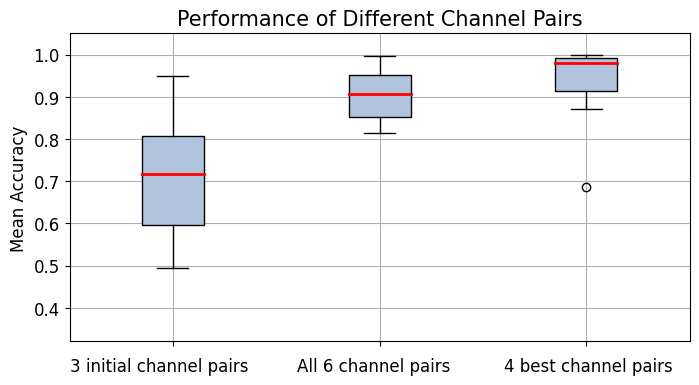

In [48]:
fig, ax = plt.subplots(1,figsize=(8,4))
bp2 = ax.boxplot([data_3_pairs['finetuned'], data_6_pairs['finetuned'], data_4_pairs['finetuned']], labels=["","",""], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)

ax.set_ylim(0.32,1.05)
    
for median in bp2['medians']:
    median.set_color('red')
    median.set_linewidth(2)

if bp2.get('fontsize') is not None:
    ax.tick_params(axis='both', labelsize=12)

ax.text(0.5, 0.25, "3 initial channel pairs", fontsize=12)
ax.text(1.6, 0.25, "All 6 channel pairs", fontsize=12)
ax.text(2.6, 0.25, "4 best channel pairs", fontsize=12)
    
plt.title("Performance of Different Channel Pairs",fontsize=15)
ax.set_ylabel('Mean Accuracy', fontsize=12)
plt.yticks(fontsize=12)
# ax.text(6, 0.92,"yellow: Before Fine-Tuning\nblue: After Fine-Tuning", backgroundcolor="white", fontsize=10)
plt.grid()

In [49]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_channel_pairs.png", bbox_inches='tight')

# Best channels: No Basemodel (subject specific), SMOTE

In [39]:
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/best_4_pairs/subject_specific/test_accuracies_2023-05-06_15-24-54.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies after Training:

Subject dani: 0.909375
Subject ivo: 0.68125
Subject pablo: 0.9870967745780945
Subject huiyu: 0.9785714387893677
Subject manu: 0.990625
Subject fabio: 0.90625
Subject anna: 0.996875
Subject luisa: 1.0
Subject sarah: 0.9208333373069764
Subject irene: 0.6857142806053161
Subject jan: 0.8483134984970093


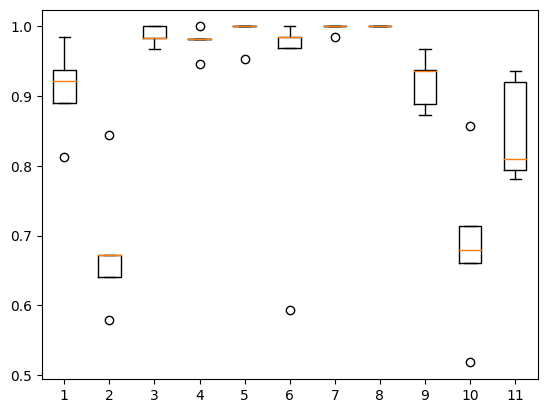

In [40]:
print("Average Test Accuracies after Training:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['Trained']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()

# Best channels: PhysioNet-6ch-basemodel, SMOTE

In [27]:
path = "G:/My Drive/University/Special_Course/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/smote/test_accuracies_2023-05-05_17-33-31.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies after Finetuning:

Subject dani: 0.9395833373069763
Subject ivo: 0.8895833373069764
Subject pablo: 0.9978494644165039
Subject huiyu: 0.9859644293785095
Subject manu: 0.984841775894165
Subject fabio: 0.9791666746139527
Subject anna: 0.9979166626930237
Subject luisa: 0.9979166626930237
Subject sarah: 0.9369298219680786
Subject irene: 0.6858950734138489
Subject jan: 0.8707835674285889


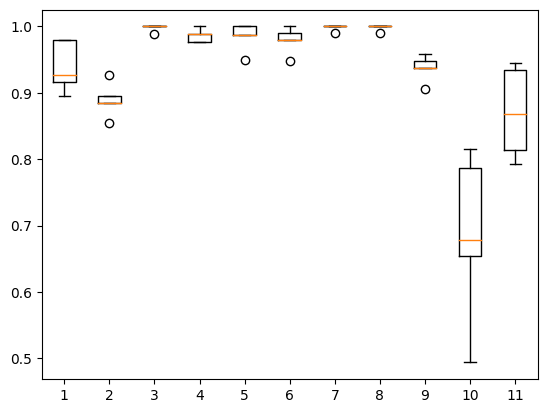

In [28]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()

# Best channels: PhysioNet-6ch-basemodel, SMOTE no move

In [36]:
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/smote_no_move/test_accuracies_2023-05-06_14-37-06.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies after Finetuning:

Subject dani: 0.928125
Subject ivo: 0.878125
Subject pablo: 0.9903225779533387
Subject huiyu: 0.9928571462631226
Subject manu: 0.98125
Subject fabio: 0.990625
Subject anna: 0.9875
Subject luisa: 0.996875
Subject sarah: 0.9683531761169434
Subject irene: 0.5892857074737549
Subject jan: 0.8702877044677735


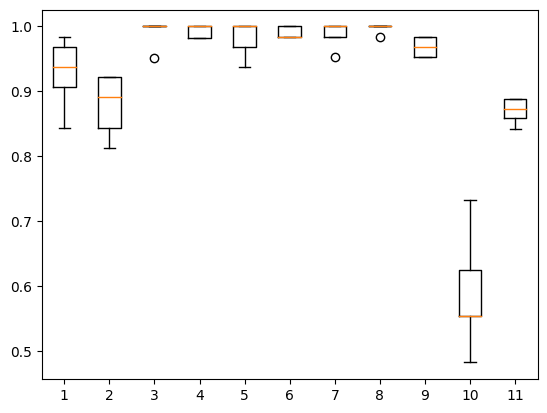

In [37]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()

# Best channels: PhysioNet-6ch-basemodel, Surrogating

In [29]:
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/surrogating/test_accuracies_2023-05-05_20-03-52.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies after Finetuning:

Subject dani: 0.825
Subject ivo: 0.8020833373069763
Subject pablo: 0.9572637915611267
Subject huiyu: 0.9508618235588073
Subject manu: 0.8994620323181153
Subject fabio: 0.8041666746139526
Subject anna: 0.9604166507720947
Subject luisa: 0.96875
Subject sarah: 0.8219517588615417
Subject irene: 0.551913571357727
Subject jan: 0.7061156392097473


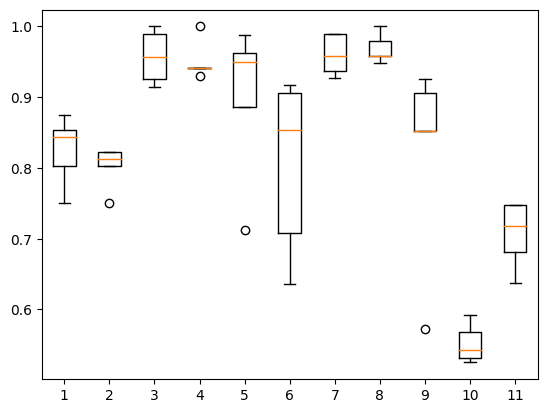

In [30]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()

# Best channels: PhysioNet-6ch-basemodel, No augmentation

In [34]:
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/no_augm/test_accuracies_2023-05-06_08-41-13.pkl"
with open(path, 'rb') as file:
    test_acc = pickle.load(file)
test_subjects = list(test_acc.keys())

Average Test Accuracies after Finetuning:

Subject dani: 0.8166666626930237
Subject ivo: 0.7979166746139527
Subject pablo: 0.9679707169532776
Subject huiyu: 0.9578659296035766
Subject manu: 0.9544936776161194
Subject fabio: 0.924999988079071
Subject anna: 0.9708333253860474
Subject luisa: 0.96875
Subject sarah: 0.8928070187568664
Subject irene: 0.6163580298423768
Subject jan: 0.7765647530555725


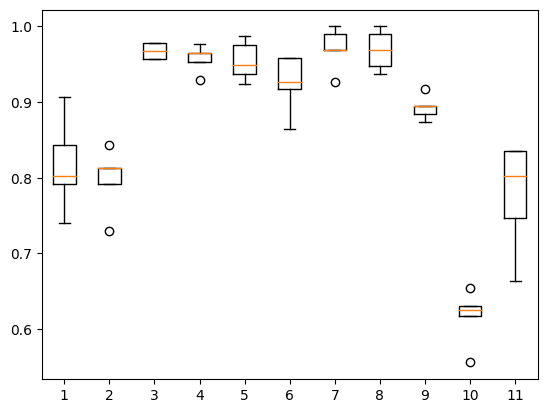

In [35]:
print("Average Test Accuracies after Finetuning:\n")

data_subjects = []
for sub in test_subjects:
    acc = test_acc[sub]['FineTuned']
    data_subjects.append(acc)
    print(f"Subject {sub}: {np.mean(acc)}")

plt.boxplot(data_subjects)
plt.show()

# Summary of Augmentation Method Evaluation

In [38]:
# No augmentation
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/no_augm/test_accuracies_2023-05-06_08-41-13.pkl"
with open(path, 'rb') as file:
    test_acc_no = pickle.load(file)
    
# SMOTE
path = "G:/My Drive/University/Special_Course/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/smote/test_accuracies_2023-05-05_17-33-31.pkl"
with open(path, 'rb') as file:
    test_acc_smote = pickle.load(file)

# Surrogating
path = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/models/1D_CNN/best_4_pairs/fine_tuned/physionet_base/surrogating/test_accuracies_2023-05-05_20-03-52.pkl"
with open(path, 'rb') as file:
    test_acc_surrogating = pickle.load(file)

In [39]:
data_no = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_no[sub]['NotTuned']
    data_no['base'].append(np.mean(acc_base))
    acc = test_acc_no[sub]['FineTuned']
    data_no['finetuned'].append(np.mean(acc))
print(f"No augmentation: not finetuned: {np.mean(data_no['base'])}")
print(f"No augmentation: finetuned: {np.mean(data_no['finetuned'])}")
    
data_smote = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_smote[sub]['NotTuned']
    data_smote['base'].append(np.mean(acc_base))
    acc = test_acc_smote[sub]['FineTuned']
    data_smote['finetuned'].append(np.mean(acc))
print(f"SMOTE augmentation: not finetuned: {np.mean(data_smote['base'])}")
print(f"SMOTE augmentation: finetuned: {np.mean(data_smote['finetuned'])}")

data_surrogating = {'base':[], 'finetuned':[]}
for sub in test_subjects_own:
    acc_base = test_acc_surrogating[sub]['NotTuned']
    data_surrogating['base'].append(np.mean(acc_base))
    acc = test_acc_surrogating[sub]['FineTuned']
    data_surrogating['finetuned'].append(np.mean(acc))
print(f"Surrogating: not finetuned: {np.mean(data_surrogating['base'])}")
print(f"Surrogating: finetuned: {np.mean(data_surrogating['finetuned'])}")

No augmentation: not finetuned: 0.5015981538729234
No augmentation: finetuned: 0.8768387978727167
SMOTE augmentation: not finetuned: 0.5015981538729234
SMOTE augmentation: finetuned: 0.9333118915557861
Surrogating: not finetuned: 0.5015981538729234
Surrogating: finetuned: 0.8407259345054626


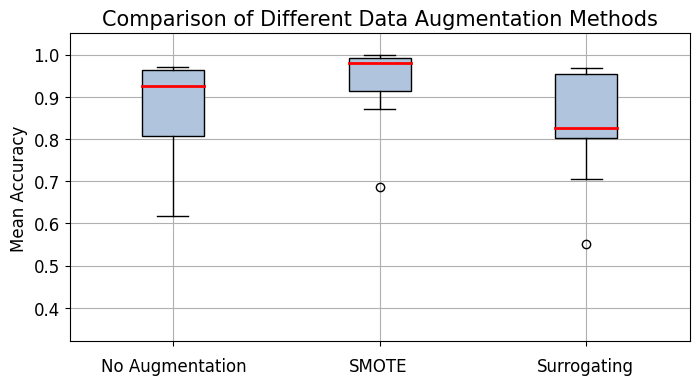

In [50]:
fig, ax = plt.subplots(1,figsize=(8,4))
bp2 = ax.boxplot([data_no['finetuned'], data_smote['finetuned'], data_surrogating['finetuned']], labels=["","",""], boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)

ax.set_ylim(0.32,1.05)
    
for median in bp2['medians']:
    median.set_color('red')
    median.set_linewidth(2)
    
ax.text(0.65, 0.25, "No Augmentation", fontsize=12)
ax.text(1.85, 0.25, "SMOTE", fontsize=12)
ax.text(2.76, 0.25, "Surrogating", fontsize=12)
    
plt.title("Comparison of Different Data Augmentation Methods",fontsize=15)
ax.set_ylabel('Mean Accuracy', fontsize=12)
plt.yticks(fontsize=12)

plt.grid()

In [51]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_augmentation.png", bbox_inches='tight')

# Subject Independent Performance

In [53]:
basemodel_physio = [0.61, 0.50, 0.71, 0.66, 0.74]
basemodel_own = [0.44, 0.46, 0.39, 0.49, 0.49, 0.54, 0.53, 0.50, 0.48, 0.46, 0.48]
basemodel_accuracies = [basemodel_physio, basemodel_own]

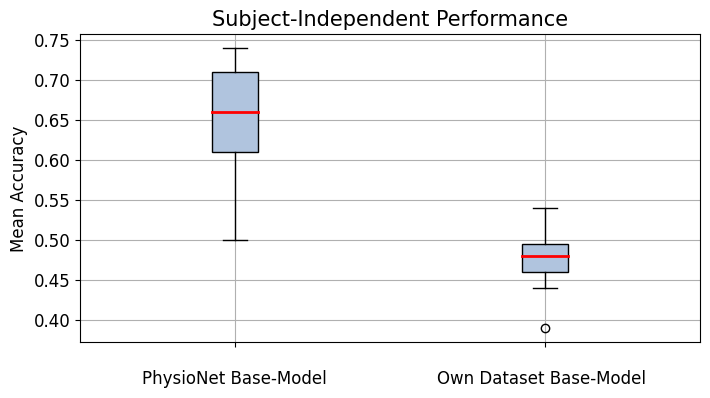

In [64]:
fig, ax = plt.subplots(1,figsize=(8,4))
bp = ax.boxplot(basemodel_accuracies, labels=["",""],boxprops=dict(facecolor='lightsteelblue'),patch_artist=True)

for median in bp['medians']:
    median.set_color('red')
    median.set_linewidth(2)

ax.text(0.7, 0.32, "PhysioNet Base-Model", fontsize=12)
ax.text(1.65, 0.32, "Own Dataset Base-Model", fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Subject-Independent Performance", fontsize=15)
ax.set_ylabel('Mean Accuracy', fontsize=12)
plt.grid()

In [65]:
fig.savefig("C:/Users/annag/OneDrive/Dokumente/Special_Course/eval_base_models.png", bbox_inches='tight')

In [66]:
np.median(basemodel_accuracies[1])

0.48